In [146]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

## By trials

In [147]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)
display(behavior_compare)

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,2,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,3,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,4,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,5,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...,...
4315,18,116,1,after,1,-1,1,1.0,-1,1,0.24539
4316,18,117,1,after,1,1,1,1.0,1,1,0.21152
4317,18,118,1,after,2,1,-1,1.0,-1,1,0.32075
4318,18,119,1,after,2,-1,-1,0.5,1,1,0.46414


In [148]:
behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & (behavior_compare['reaction time'] > 0.05) & (behavior_compare['type'] == 2)]
rt_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0]
rt_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1]
# rt_sham = fb.remove_outlier(rt_sham)
# rt_real = fb.remove_outlier(rt_real)
rt_sham_before = rt_sham.loc[rt_sham['session'] == 'before', 'reaction time'].values
rt_sham_after = rt_sham.loc[rt_sham['session'] == 'after', 'reaction time'].values
rt_real_before = rt_real.loc[rt_real['session'] == 'before', 'reaction time'].values
rt_real_after = rt_real.loc[rt_real['session'] == 'after', 'reaction time'].values
rt_sham = rt_sham['reaction time']
rt_real = rt_real['reaction time']

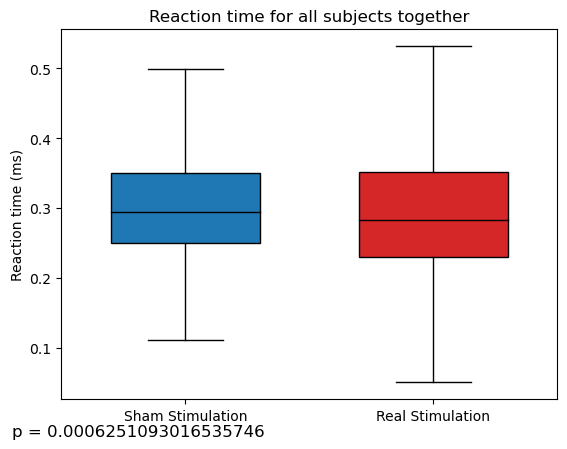

In [149]:
# box plot of RT difference
# for compare_object in compare_objects:

# watch = 'All'
# save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

# create boxplot
# Create a box plot with whiskers
fig, ax = plt.subplots()
boxplots = ax.boxplot([rt_sham, rt_real], patch_artist=True, widths=0.6, showfliers=False)

# Set colors for the box plots
colors = ['#1f77b4', '#d62728']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color to black
for median in boxplots['medians']:
    median.set_color('black')

plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for all subjects together')

# Perform the Mann-Whitney U test
U, p_value = stats.mannwhitneyu(rt_sham, rt_real)

# Add the p-value to the plot
ax.annotate(f'p = {p_value}', # :.4f means 4 decimal places
            xy=(-0.1, -0.1),
            xycoords=('axes fraction', 'axes fraction'),
            ha='left', fontsize=12)
# plt.savefig(save_path, format='png')

plt.show()

## Distribution

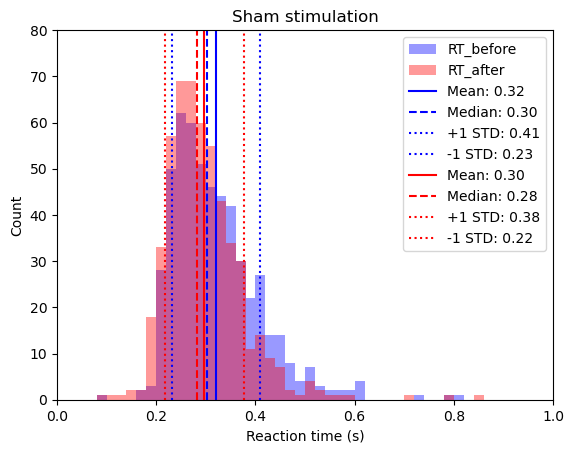

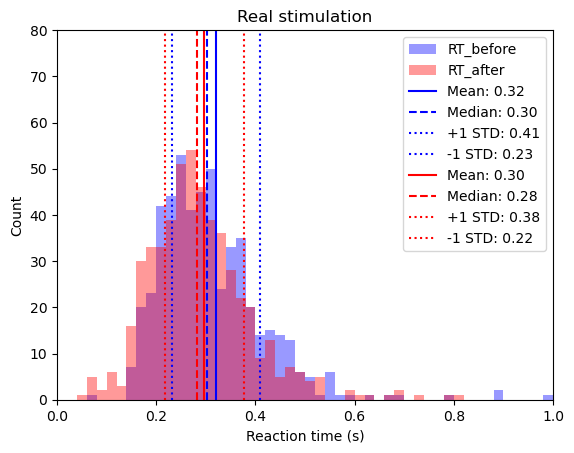

In [150]:
bin_size = 50
xmax = 1
ymax = 80
bin_edges = np.linspace(0, xmax, bin_size+1)

mu_before, median_before, sigma_before = np.mean(rt_sham_before), np.median(rt_sham_before), np.std(rt_sham_before)
mu_after, median_after, sigma_after = np.mean(rt_sham_after), np.median(rt_sham_after), np.std(rt_sham_after)

fig, ax = plt.subplots()

ax.hist(rt_sham_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_sham_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Sham stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(rt_real_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_real_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Real stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

### Behavior by time

In [151]:
behavior_compare

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,2,1,before,2,-1,1,1.0,-1,1,0.21226
6,1,7,1,before,2,-1,1,1.0,-1,1,0.17723
8,1,9,1,before,2,1,1,1.0,1,1,0.20720
9,1,10,1,before,2,1,-1,1.0,-1,1,0.24041
...,...,...,...,...,...,...,...,...,...,...,...
4308,18,109,1,after,2,-1,1,0.5,-1,1,0.38313
4313,18,114,1,after,2,-1,1,1.0,-1,1,0.30852
4317,18,118,1,after,2,1,-1,1.0,-1,1,0.32075
4318,18,119,1,after,2,-1,-1,0.5,1,1,0.46414


In [152]:
all_real = [1, 3, 4, 5, 9, 12, 13, 17, 18]
all_sham = [2, 6, 7, 8, 10, 11, 14, 15, 16]

behav_over_sham_before = np.ndarray(shape=(9, 120))
behav_over_sham_after = np.ndarray(shape=(9, 120))
behav_over_real_before = np.ndarray(shape=(9, 120))
behav_over_real_after = np.ndarray(shape=(9, 120))

real_id = 0
sham_id = 0

for sub in all_real:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_real_before[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_real_after[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    real_id += 1

for sub in all_sham:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_sham_before[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_sham_after[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    sham_id += 1

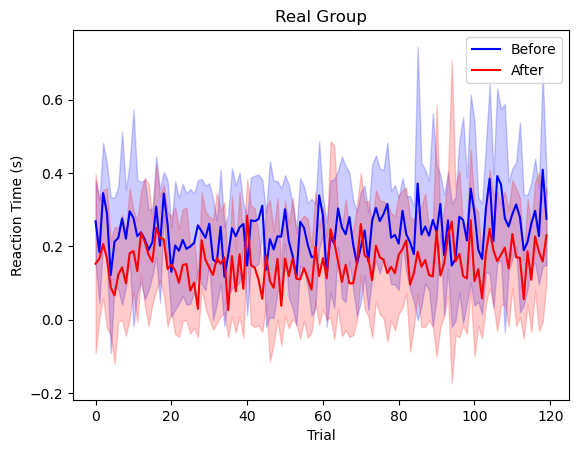

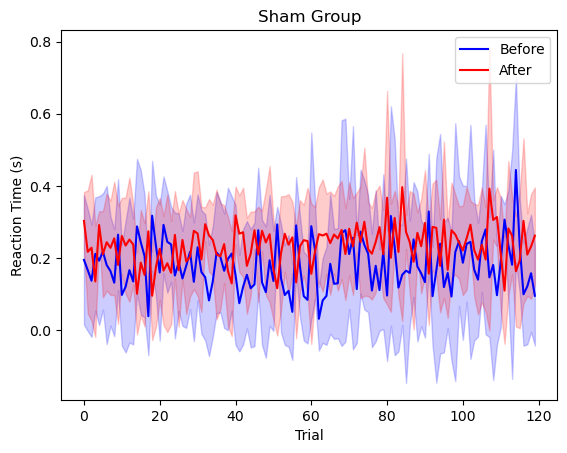

In [153]:
def plot_line_chart(data_before, data_after, title):
    # Calculate the mean and standard deviation, ignoring uninitialized values
    mean_before = np.nanmean(data_before, axis=0)
    std_before = np.nanstd(data_before, axis=0)
    mean_after = np.nanmean(data_after, axis=0)
    std_after = np.nanstd(data_after, axis=0)

    # Plot mean lines
    plt.plot(mean_before, color='blue', label='Before')
    plt.plot(mean_after, color='red', label='After')

    # Plot shaded areas for standard deviation
    plt.fill_between(range(len(mean_before)), mean_before - std_before, mean_before + std_before, color='blue', alpha=0.2)
    plt.fill_between(range(len(mean_after)), mean_after - std_after, mean_after + std_after, color='red', alpha=0.2)

    plt.title(title)
    plt.xlabel('Trial')
    plt.ylabel('Reaction Time (s)')
    plt.legend()
    plt.show()

# Replace uninitialized values with NaN to ignore them in mean and std calculations
behav_over_real_before[behav_over_real_before == 0] = np.nan
behav_over_real_after[behav_over_real_after == 0] = np.nan
behav_over_sham_before[behav_over_sham_before == 0] = np.nan
behav_over_sham_after[behav_over_sham_after == 0] = np.nan

# Plot the charts
plot_line_chart(behav_over_real_before, behav_over_real_after, 'Real Group')
plot_line_chart(behav_over_sham_before, behav_over_sham_after, 'Sham Group')
